# 格子ネットワークとWatts-Strogatzモデル
### 格子ネットワークを生成して，基本的なネットワーク指標を計算します。

In [2]:
import pandas as pd
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

## 格子ネットワーク
### 格子ネットワークの生成と描画


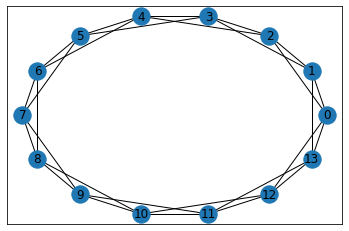

In [19]:
g = nx.watts_strogatz_graph(14, 4, 0)
nx.draw_networkx(g, pos=nx.circular_layout(g))

### 平均最短経路長

In [9]:
d_ave = []
N_seq = range(500, 10000, 500)

for N in N_seq:
    g = nx.watts_strogatz_graph(N, 4, 0)
    d_ave.append(nx.average_shortest_path_length(g))

    

In [13]:
lines = [x/8 for x in range(500, 10000)]

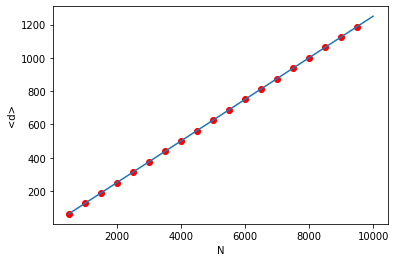

In [17]:
plt.plot(N_seq, d_ave, "ro")
plt.plot(range(500, 10000), lines)

plt.ylabel("<d>")
plt.xlabel("N")
plt.ylim=(0, 1300)

## Watts-Strogatzモデル
### Watts-Strogatzモデルネットワークの描画


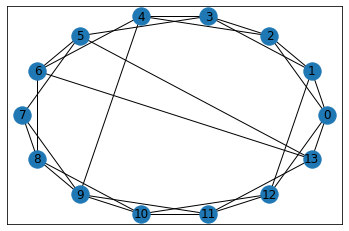

In [18]:
g = nx.watts_strogatz_graph(14, 4, 0.1)
nx.draw_networkx(g, pos=nx.circular_layout(g))

### スモールワールド性の検証

In [20]:
N = 1000
k = 4

p_set = [0,0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
c_ave_l = []
d_ave_l = []

for p in p_set:
    g = nx.watts_strogatz_graph(N, k, p)

    c_ave = nx.average_clustering(g)
    d_ave = nx.average_shortest_path_length(g)

    if p == 0:
        c_ave_base = c_ave
        d_ave_base = d_ave
    else:
        c_ave_l.append(c_ave / c_ave_base)
        d_ave_l.append(d_ave / d_ave_base)

        

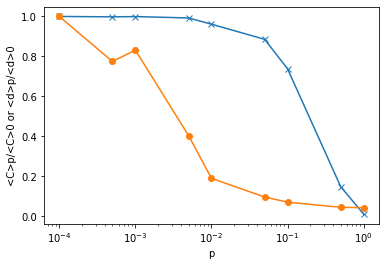

In [29]:
plt.plot(p_set[1:], c_ave_l, "x-")
plt.plot(p_set[1:], d_ave_l, "o-")

plt.xlabel("p")
plt.ylabel("<C>p/<C>0 or <d>p/<d>0")
plt.xscale("log")
